In [ ]:
# pip install DeepFace

In [ ]:
# pip install fer

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from fer import FER
from deepface import DeepFace

- it technically does the job, however its quite slow.

In [3]:
# Define emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
# emo_detector = FER(mtcnn=True)

# Start capturing video
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    
#     result = emo_detector.detect_emotions(frame)
    try:
        result = DeepFace.analyze(frame, actions=["emotion", "age", "gender", "race"])
    
    except ValueError:
        continue
    
    bbox = result[0]["region"]
    emotions = result[0]["emotion"]
    dominant_emotion = result[0]["dominant_emotion"]
    age = result[0]["age"]
    gender = result[0]["dominant_gender"]
    races = result[0]["race"]
    dominant_race = result[0]["dominant_race"]
    

    
    # Draw rectangle around face and label with predicted emotion
#     cv2.rectangle(frame, (0, 0), (200, 200), (0, 0, 0), -1)
    
    # face bounding box
    x, y, w, h = bbox["x"], bbox["y"], bbox["w"], bbox["h"]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    
    # emotion scores
    for idx, em in enumerate(emotion_labels):
        text = f"{em}: {emotions[em]:.4f}"
        cv2.putText(frame, text, (10, 20*(idx+1)), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 0), 2)
        
    cv2.putText(frame, f"Emotion: {dominant_emotion} - {emotions[dominant_emotion]:.4f}",
            (10, 20*(idx+2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 0), 2)

    cv2.putText(frame, f"age: {age}", (10, 20*(idx+3)), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 0), 2)    
    cv2.putText(frame, f"gender: {gender}", (10, 20*(idx+4)), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 0), 2)    
    cv2.putText(frame, f"race: {dominant_race}", (10, 20*(idx+5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 0), 2)
    
    cv2.putText(frame, "Press \'q\' to exit", (500, 465), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255, 255, 255), 2)
    
    # Display the resulting frame
    cv2.imshow('Real-time Emotion Detection', frame)
    
    
    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.76it/s]


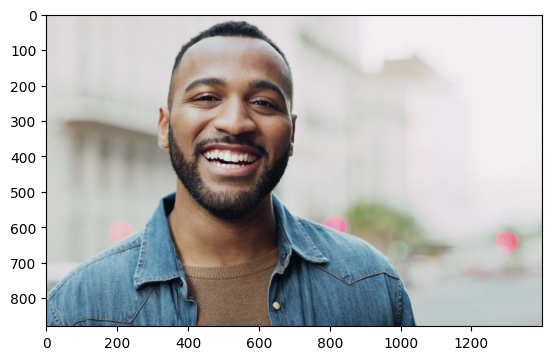

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.96it/s]

{'emotion': {'angry': 1.6737582478682806e-05, 'disgust': 7.782390090269141e-14, 'fear': 2.3193584043188362e-10, 'happy': 97.99509072362295, 'sad': 1.5701925353293737e-05, 'surprise': 0.0007313524330494819, 'neutral': 2.0041362787322665}, 'dominant_emotion': 'happy', 'region': {'x': 326, 'y': 76, 'w': 415, 'h': 415}, 'age': 23, 'gender': {'Woman': 2.1200224864514894e-05, 'Man': 99.99997615814209}, 'dominant_gender': 'Man', 'race': {'asian': 3.9441005128537654e-05, 'indian': 7.380787110378151e-05, 'black': 99.99939203262329, 'white': 2.3526134373952345e-07, 'middle eastern': 8.552305530429294e-07, 'latino hispanic': 0.0004960978458257159}, 'dominant_race': 'black'}


In [13]:
# read image
img = cv2.imread("happy-1.jpg")
# img = img[800:2400, 900:2000, : : -1]
img = img[:, :, : : -1]
# call imshow() using plt object
plt.imshow(img)

# display that image
plt.show()

# storing the result
emo_detector = FER(mtcnn=True)
emotion = emo_detector.detect_emotions(img)
    

demography = DeepFace.analyze(img, actions=["emotion", "age", "gender", "race"])
  
# print result
# print(emotion[0])
print(demography[0])
x, y, w, h = demography[0]["region"]